# Information Retrieval

Bag of Words and TF-IDF

## 1 - Library Imports

In [41]:
%reset -f

# Import Os to get to the root directory
import os
import sys

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)
TEST_DIR = os.path.join(ROOT_DIR, "test-white-papers")


# Import own functions
from libraries import corpus
from libraries import pdf2text

import warnings
warnings.filterwarnings("ignore")

##########################
# Import other libraries
##########################

# Data Manipulation
import numpy as np
import pandas as pd
import re

# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Natural Language Processing libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
from nltk.probability import FreqDist
from nltk import bigrams, ngrams
from nltk.stem import SnowballStemmer

import string # for punctuation
import gc

# Vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
# To reload own libraries when a change is made
from importlib import reload
reload(corpus)

<module 'libraries.corpus' from 'C:\\Users\\laman\\Desktop\\datascience_project\\libraries\\corpus.py'>

## 2 - Data Preprocessing

In [44]:
# Retrieving the PDF files from white-paper folder and converting them to text
dataset = pdf2text.get_dataset()

In [45]:
# Print all the white papers' names
dataset.keys()

dict_keys(['#metahash', '0x', 'abbccoin', 'aion', 'apollocurrency', 'ardor', 'ark', 'basicattentiontoken', 'bhpcoin', 'binancecoin', 'bitcoin', 'bitcoingold', 'bitshares', 'bittorrent', 'bytecoin', 'bytom', 'celernetwork', 'chainlink', 'cosmocoin', 'cosmos', 'crypto', 'cryptonex', 'dai', 'dash', 'decentraland', 'dent', 'digixdao', 'dogecoin', 'elastos', 'enjincoin', 'eos', 'ethereum', 'ethereumclassic', 'factom', 'fantom', 'gnosis', 'golem', 'gxchain', 'holo', 'horizen', 'hypercash', 'hyperion', 'icon', 'iexecrlc', 'inocoin', 'iota', 'japancontenttoken', 'komodo', 'latoken', 'lina', 'loopring', 'maidsafecoin', 'maker', 'metal', 'metaverseetp', 'mixin', 'monero', 'nano', 'nebulas', 'nem', 'nexo', 'nkn', 'obyte', 'omisego', 'ontology', 'orbs', 'particl', 'paxosstandardtoken', 'powerledger', 'pundix', 'ravencoin', 'riftoken', 'siacoin', 'singularitynet', 'skycoin', 'solve', 'status', 'steem', 'stellar', 'stratis', 'synthetixnetworktoken', 'tenx', 'tether', 'tezos', 'theta', 'thetafuel', '

In [46]:
# Size of corpus
len(dataset.keys())

99

In [47]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = True
# Creates a dictionary with each White Paper and its text pre-processed
corpora_sent = corpus.makeCleanCorpus(dataset, lemmatize=False, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True, removeEnt=False)

Cleaning: #metahash


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: 0x
Cleaning: abbccoin
Cleaning: aion
Cleaning: apollocurrency
Cleaning: ardor
Cleaning: ark
Cleaning: basicattentiontoken
Cleaning: bhpcoin
Cleaning: binancecoin
Cleaning: bitcoin
Cleaning: bitcoingold
Cleaning: bitshares
Cleaning: bittorrent
Cleaning: bytecoin
Cleaning: bytom
Cleaning: celernetwork
Cleaning: chainlink
Cleaning: cosmocoin
Cleaning: cosmos
Cleaning: crypto
Cleaning: cryptonex
Cleaning: dai
Cleaning: dash
Cleaning: decentraland
Cleaning: dent
Cleaning: digixdao
Cleaning: dogecoin
Cleaning: elastos
Cleaning: enjincoin
Cleaning: eos
Cleaning: ethereum
Cleaning: ethereumclassic
Cleaning: factom
Cleaning: fantom
Cleaning: gnosis
Cleaning: golem
Cleaning: gxchain
Cleaning: holo
Cleaning: horizen
Cleaning: hypercash
Cleaning: hyperion
Cleaning: icon
Cleaning: iexecrlc
Cleaning: inocoin
Cleaning: iota
Cleaning: japancontenttoken
Cleaning: komodo
Cleaning: latoken
Cleaning: lina
Cleaning: loopring
Cleaning: maidsafecoin
Cleaning: maker
Cleaning: metal
Cleaning: metaver

In [48]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = False
# Creates a dictionary with each White Paper and its text pre-processed
corpora_whole = corpus.makeCleanCorpus(dataset, lemmatize=False, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True, removeEnt=False)

Cleaning: #metahash


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: 0x
Cleaning: abbccoin
Cleaning: aion
Cleaning: apollocurrency
Cleaning: ardor
Cleaning: ark
Cleaning: basicattentiontoken
Cleaning: bhpcoin
Cleaning: binancecoin
Cleaning: bitcoin
Cleaning: bitcoingold
Cleaning: bitshares
Cleaning: bittorrent
Cleaning: bytecoin
Cleaning: bytom
Cleaning: celernetwork
Cleaning: chainlink
Cleaning: cosmocoin
Cleaning: cosmos
Cleaning: crypto
Cleaning: cryptonex
Cleaning: dai
Cleaning: dash
Cleaning: decentraland
Cleaning: dent
Cleaning: digixdao
Cleaning: dogecoin
Cleaning: elastos
Cleaning: enjincoin
Cleaning: eos
Cleaning: ethereum
Cleaning: ethereumclassic
Cleaning: factom
Cleaning: fantom
Cleaning: gnosis
Cleaning: golem
Cleaning: gxchain
Cleaning: holo
Cleaning: horizen
Cleaning: hypercash
Cleaning: hyperion
Cleaning: icon
Cleaning: iexecrlc
Cleaning: inocoin
Cleaning: iota
Cleaning: japancontenttoken
Cleaning: komodo
Cleaning: latoken
Cleaning: lina
Cleaning: loopring
Cleaning: maidsafecoin
Cleaning: maker
Cleaning: metal
Cleaning: metaver

## 3 - Methods Application

### Tokenization

Tokenization is the first step. The text documents will be broken down into small pieces, in this case words. These tokenized words are called tokens. 

In [50]:
# Define function
def tokenization(corpus, protocol):
    """
    Function that receives a name of a protocol and return the tokens.
    Input:
        Name of protocol
    Output:
        Tokens
    """
    assert protocol in corpus.keys()
    
    # Start tokenizing the dataset
    tokenizer = nltk.tokenize.RegexpTokenizer('\s+', gaps=True)

    if makeSentences:
        #############################################
        # Tokenization on sentences for a specific 
        tokens = [tokenizer.tokenize(s) for s in corpus[protocol]]
        # Flatten the list
        tokens = np.reshape(np.concatenate(tokens), -1)
        #############################################
    else:
        #############################################
        # Tokenization on whole corpus (no sentences)
        tokens = tokenizer.tokenize(corpus[protocol])
        #############################################

    print('We have', len(tokens), 'words in total. \n')
    print(tokens[5:10])
    
    return tokens

### Frequency Distribution

The FreqDist can quickly show how frequent a word occurs in the coprus. Frequency Distribution enables to define the most informative words about the topic of the text document.
https://www.nltk.org/book/ch01.html

In [51]:
# Get tokens for a specific white paper
tokens = tokenization(corpora_whole, "bitcoin")

# Create the object with all the tokens
fdist = FreqDist(tokens)
fdist.most_common(10)

We have 1486 words in total. 

['purely', 'peertopeer', 'version', 'electronic', 'cash']


[('block', 46),
 ('hash', 42),
 ('transaction', 36),
 ('transactions', 33),
 ('nodes', 31),
 ('chain', 25),
 ('network', 21),
 ('attacker', 19),
 ('blocks', 19),
 ('proofofwork', 18)]

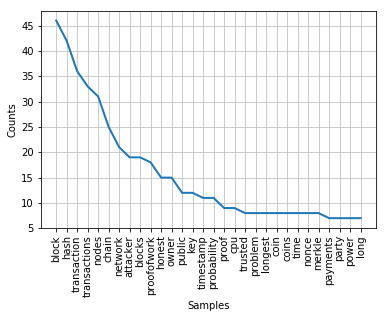

In [52]:
fdist.plot(30,cumulative=False)
plt.show()

### N-grams

N-grams is a sequence of N words. Extracting a list of word pairs from a text is known as bigrams. N-gram model predicts the occurrence of a word based on the occurrence of its N – 1 previous words. So here we are answering the question – how far back in the history of a sequence of words should we go to predict the next word?

In [53]:
def ngrams(tokens, n = 2):
    
    assert n > 1
    
    if n == 2:
        bigrams_tokens = bigrams(tokens)
        fdist_bigrams = FreqDist(list(bigrams_tokens))
        fdist_bigrams.plot(30,cumulative=False)
        plt.show()
    if n == 3:
        trigrams_tokens = ngrams(tokens, 3)
        fdist_trigrams = FreqDist(list(trigrams_tokens))
        fdist_trigrams.plot(30,cumulative=False)
        plt.show()
    if n > 3:
        grams_tokens = ngrams(tokens, n)
        fdist_grams = FreqDist(list(grams_tokens))
        fdist_grams.plot(30,cumulative=False)
        plt.show()

### Bag of Words / Word Cloud

A popular and simple method of feature extraction with text data is called the bag-of-words model of text.

In [54]:
def bag_words(corpus, protocol):

    # Initialize a CountVectorizer object: count_vectorizer
    count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                                ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

    text = [corpus[protocol]]
    # Transforms the data into a bag of words
    count_train = count_vec.fit(text)
    bag_of_words = count_vec.transform(text)
    
    return bag_of_words, count_vec


In [61]:
def word_cloud(corpus,protocol):
    text = corpus[protocol]
    wordcloud = WordCloud(background_color="white",
                          stopwords = set(STOPWORDS)
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

## 4 - Outcome

### Input

In [55]:
testset = pdf2text.get_dataset(path=TEST_DIR)
testset.keys()

dict_keys(['adcoin', 'budbo', 'kwattcoin', 'oceanprotocol'])

In [56]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = False
# Creates a dictionary with each White Paper and its text pre-processed
corpora_test = corpus.makeCleanCorpus(testset, lemmatize=True, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True, removeEnt=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: adcoin
Cleaning: budbo
Cleaning: kwattcoin
Cleaning: oceanprotocol
Done!


### Model/Method

#### Oceanprotocol

We have 8478 words in total. 

['version', 'apr', 'paper', 'decentralize', 'protocol']


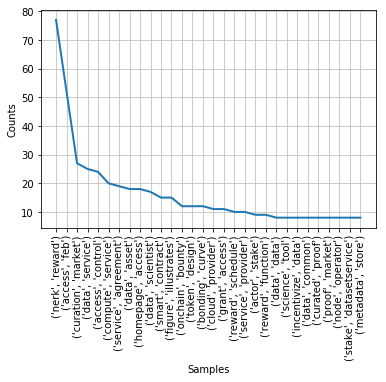

In [74]:
tokens = tokenization(corpora_test, "oceanprotocol")

ngrams(tokens,2)

In [75]:
bag, vect = bag_words(corpora_test,"oceanprotocol")

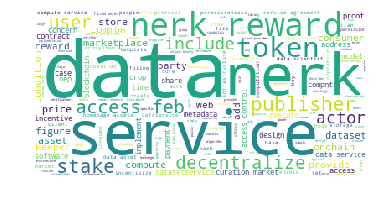

In [76]:
word_cloud(corpora_test,"oceanprotocol")

In [87]:
# Get tokens for a specific white paper
tokens = tokenization(corpora_test, "oceanprotocol")

# Create the object with all the tokens
fdist = FreqDist(tokens)
fdist.most_common(10)

We have 8478 words in total. 

['version', 'apr', 'paper', 'decentralize', 'protocol']


[('data', 285),
 ('service', 192),
 ('nerk', 184),
 ('reward', 132),
 ('access', 129),
 ('token', 94),
 ('stake', 75),
 ('compute', 70),
 ('figure', 60),
 ('publisher', 60)]

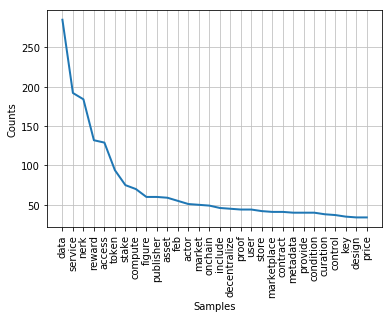

In [88]:
fdist.plot(30,cumulative=False)
plt.show()

## TF - IDF

In [77]:
# Function that converts a dictionary into a Pandas Dataframe
# The indexes are the name of the files
df = corpus.dictionaryToPandas(corpora_test)

In [78]:
# Define to show all the data
pd.set_option('display.max_colwidth', 100)
# Inspect the DataFrame
df.head()

,text
adcoin,version offer lot great opportunity technological advancement adopt blockchain literally interne...
budbo,global cannabis comehensive solution cannabis indtry version web wwwio content forward statement...
kwattcoin,newwhitepaper disclaimer document document constitute prospectus sort solicitation investment co...
oceanprotocol,decentralize substrate service technical foundation version apr paper decentralize protocol nerk...


In [79]:
# Define a function to perform both stemming and tokenization
def tokenize_and_stem(text):
    
    # Tokenize by sentence, then by word
    tokens = [word for text in nltk.sent_tokenize(text) for word in nltk.word_tokenize(text)]
    
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    
    # Stem the filtered_tokens
    stems = []
    for token in filtered_tokens:
         stems.append(stemmer.stem(token))

    return stems

words_stemmed = tokenize_and_stem('')
print(words_stemmed)

[]


In [80]:
# Instantiate TfidfVectorizer object with stopwords and tokenizer
# parameters for efficient processing of text
tfidf_vectorizer = TfidfVectorizer(max_features=20000,
                                        stop_words='english', lowercase = True,
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

In [81]:
# Fit and transform the tfidf_vectorizer with the "text" of each paper
# to create a vector representation of the plot summaries
tfidf_matrix = tfidf_vectorizer.fit_transform(corpora_test.values())

print(type(tfidf_matrix))

NameError: name 'stemmer' is not defined

In [82]:
matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names(),index=corpora_test.keys())
matrix.head(10)

NameError: name 'tfidf_matrix' is not defined

# 5 - Inspiration 

- https://www.kaggle.com/rochachan/part-1-for-beginners-bag-of-words
- 'Bag_of_Words_tfidf_Simple_PreProcessing.ipynb' notebook by Prof. Löcher
- https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
- https://honingds.com/blog/natural-language-processing-with-python/
- https://www.kaggle.com/ngyptr/python-nltk-sentiment-analysis
- https://blog.xrds.acm.org/2017/10/introduction-n-grams-need/